In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math

In [2]:
data=pd.read_csv("D:/DX/arhit/EXUSEU.csv")

In [3]:
data.head()

,DATE,EXUSEU,EXUSJP,EXUSIN,EXUSCH
0,01-01-1999,1.1591,0.008827,0.023507,0.120789
1,01-02-1999,1.1203,0.008571,0.023348,0.120800
2,01-03-1999,1.0886,0.008370,0.023529,0.120785
3,01-04-1999,1.0701,0.008349,0.023343,0.120785
4,01-05-1999,1.0630,0.008197,0.023164,0.120794


In [4]:
data.EXUSJP

0      0.008827
1      0.008571
2      0.008370
3      0.008349
4      0.008197
5      0.008283
6      0.008380
7      0.008832
8      0.009357
9      0.009437
10     0.009556
11     0.009748
12     0.009497
13     0.009142
14     0.009407
15     0.009467
16     0.009232
17     0.009423
18     0.009241
19     0.009252
20     0.009360
21     0.009221
22     0.009174
23     0.008912
24     0.008571
25     0.008603
26     0.008230
27     0.008079
28     0.008212
29     0.008173
         ...   
216    0.008705
217    0.008856
218    0.008856
219    0.009083
220    0.008909
221    0.009016
222    0.008895
223    0.009105
224    0.009027
225    0.008856
226    0.008864
227    0.008854
228    0.009019
229    0.009262
230    0.009430
231    0.009289
232    0.009117
233    0.009086
234    0.008967
235    0.009009
236    0.008921
237    0.008871
238    0.008823
239    0.008913
240    0.009178
241    0.009055
242    0.008997
243    0.008957
244    0.009093
245    0.009253
Name: EXUSJP, Length: 24

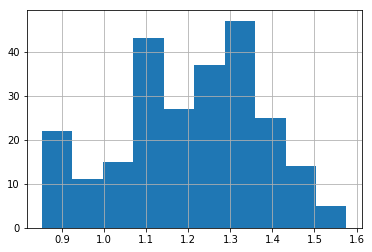

In [5]:
data.EXUSEU.hist()

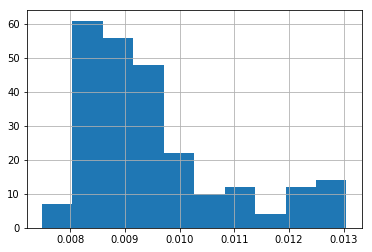

In [6]:
data.EXUSJP.hist()

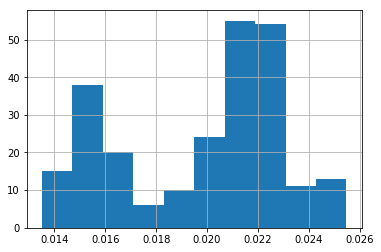

In [7]:
data.EXUSIN.hist()

In [8]:
data.head().T

,0,1,2,3,4
DATE,01-01-1999,01-02-1999,01-03-1999,01-04-1999,01-05-1999
EXUSEU,1.1591,1.1203,1.0886,1.0701,1.063
EXUSJP,0.0088269,0.0085713,0.00837009,0.00834918,0.00819676
EXUSIN,0.0235073,0.0233481,0.0235294,0.0233427,0.0231642
EXUSCH,0.120789,0.1208,0.120785,0.120785,0.120794


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D810E52080>,
      dtype=object)

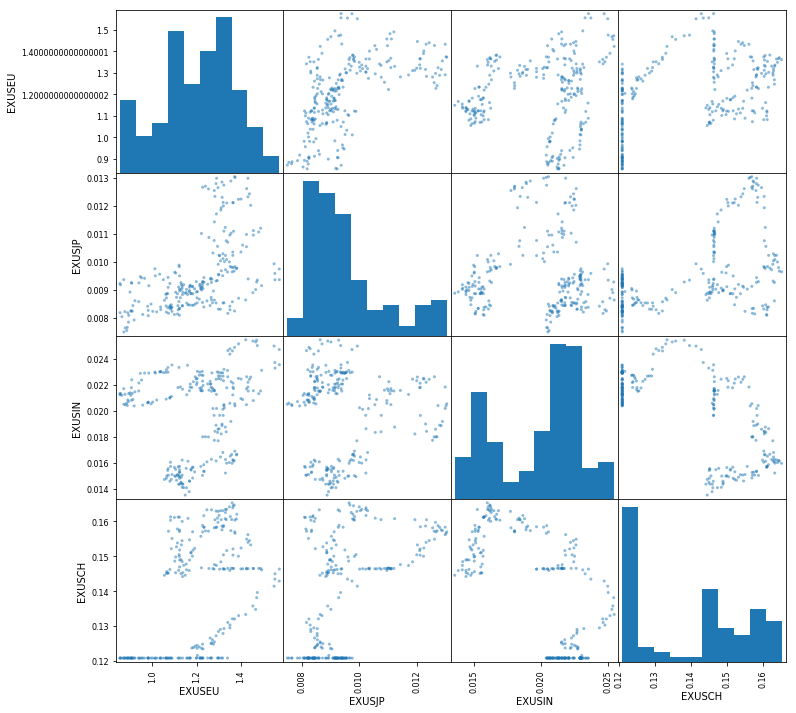

In [9]:
pd.plotting.scatter_matrix(data, figsize=(12,12))

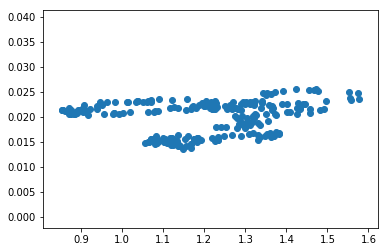

In [10]:
plt.scatter(data.EXUSEU,data.EXUSIN)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=data.iloc[:,1:4]

In [13]:
y=data.iloc[:,-1:]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train, X_train).fit()

C:\Users\Rohit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [16]:
#m1=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EXUSCH   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     399.3
Date:                Wed, 10 Jul 2019   Prob (F-statistic):           3.44e-76
Time:                        17:40:44   Log-Likelihood:                 644.87
No. Observations:                 172   AIC:                            -1282.
Df Residuals:                     168   BIC:                            -1269.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1249      0.004     28.612      0.000       0.116       0.134
EXUSEU         0.0419      0.003     12.639      0.000       0.035       0.048
EXUSJP         3.9667      0.397      9.982      0.000       3.182       4.751
EXUSIN        -3.7020      0.141    -26.323      0.000      -3.980      -3.424
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   2.227
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.391
Skew:                          -0.188   Prob(JB):                        0.499
Kurtosis:                       2.771   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

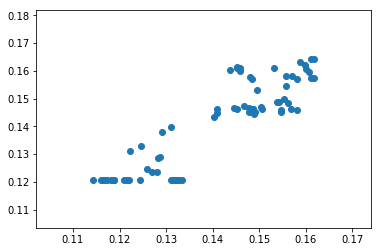

In [17]:
X_test=sm.add_constant(X_test)
y_pred=model.predict(X_test)
plt.scatter(y_pred,y_test)

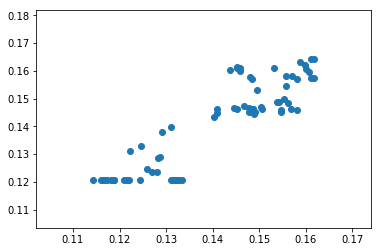

In [18]:
plt.scatter(y_pred,y_test)

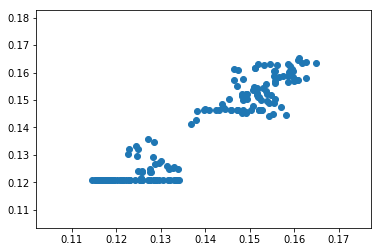

In [19]:
X_test=sm.add_constant(X_test)
y_tpred=model.predict(X_train)
plt.scatter(y_tpred,y_train)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [21]:
# Create an empty model
lr = LinearRegression()

In [22]:
# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
lr.score(X_train,y_train)

0.8770123749360658

In [23]:
# Fit the model to the full dataset
lr.fit(X_test, y_test)

# Print out the R^2 for the model against the full dataset
lr.score(X_test,y_test)

0.8046451828547381

In [24]:
pred = lr.predict(y_train)

ValueError: shapes (172,1) and (4,1) not aligned: 1 (dim 1) != 4 (dim 0)

In [32]:
X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.as_matrix()
y_ts_arr = y_test.as_matrix()

C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [33]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_test.shape)

Input Shape (172, 4)
Output Shape (74, 4)


In [34]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [35]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [36]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [37]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [38]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [39]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr.round(),normalize=False))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr.round(),normalize=False))

Number of Features 4
Optimized weights [[-0.13487653 -0.16145883 -0.00127902 -0.00270933]]
Optimized intercept -0.13487653206359826
Training Accuracy 172
Test Accuracy 74


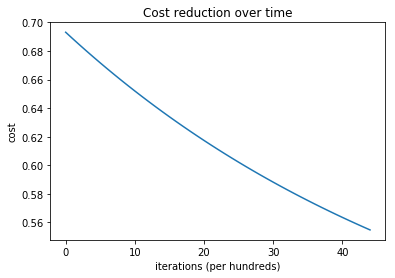

In [40]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [41]:
import math
from IPython.core.debugger import Tracer;

In [42]:
def SSE(m,b,data):
    totalErrorm = 3
b = 2=0.0
    totalNan = 0
    for i in range(data.shape[0]):
        if(math.isnan(data[i,0])):
            totalNan +=1
        else:
            yOutput = m*data[i,0]+b
            y = data[i,1]
            error = (y-yOutput)**2
            totalError =totalError+ error
    return totalError

IndentationError: unexpected indent (<ipython-input-42-534e2b18b736>, line 4)

In [43]:
X=data.iloc[:,2:3]

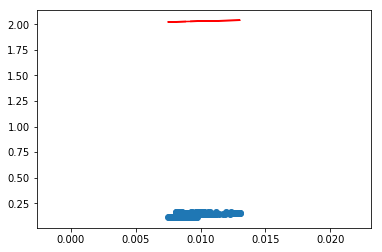

In [44]:
m = 3
b = 2
plt.scatter(X,y)
plt.plot(X,m*X+b,color='red')

In [56]:
sse = SSE(m,b,data)

NameError: name 'SSE' is not defined

In [46]:
def gradient_descent_step(m,b,data):
    
    n_points = data.shape[0] #size of data
    m_grad = 0
    b_grad = 0
    stepper = 0.0001 #this is the learning rate
    
    for i in range(n_points):

        #Get current pair (x,y)
        x = data[i,0]
        y = data[i,1]
        if(math.isnan(x)|math.isnan(y)): #it will prevent for crashing when some data is missing
            #print("is nan")
            continue
        
        #you will calculate the partical derivative for each value in data
        #Partial derivative respect 'm'
        dm = -((2/n_points) * x * (y - (m*x + b)))
        
        #Partial derivative respect 'b'
        db = - ((2/n_points) * (y - (m*x + b)))
       
        
        #Update gradient
        m_grad = m_grad + dm
        b_grad = b_grad + db
        
    #Set the new 'better' updated 'm' and 'b'   
    m_updated = m - stepper*m_grad
    b_updated = b - stepper*b_grad
    #print('m ', m)
    ##print('steepr*gradient ',stepper*m_grad)
    #print('m_updated', m_updated)
    '''
    Important note: The value '0.0001' that multiplies the 'm_grad' and 'b_grad' is the 'learning rate', but it's a concept
    out of the scope of this challenge. For now, just leave that there and think about it like a 'smoother' of the learn, 
    to prevent overshooting, that is, an extremly fast and uncontrolled learning.
    '''
    
    return m_updated,b_updated

In [47]:
print('Starting line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))
for i in range(10000):
    m,b = gradient_descent_step(m,b,data)
    sse = SSE(m,b,data)
    #print('At step %d - Line: y = %.2fx + %.2f - Error: %.2f' %(i+1,m,b,sse))
print('\nBest  line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))

NameError: name 'sse' is not defined

In [48]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [49]:
ridge_regressor.best_params_

{'alpha': 1e-15}

In [52]:
ridge_regressor.best_score_

-0.00029774267042625887

In [53]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [54]:
lasso_regressor.best_params_

{'alpha': 1e-15}

In [55]:
lasso_regressor.best_score_

-0.0002977426704313552